In [ ]:
!pip install nfl_data_py
!pip install pandas
!pip install os
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.4 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.11.0 requires pandas>=2.1, but you have pandas 1.5.3 which i

In [ ]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
#Play-by-Play Data

pbp = nfl.import_pbp_data([2022, 2023, 2024])
pbp_2022 = nfl.import_pbp_data(years=[2022])
pbp_2023 = nfl.import_pbp_data(years=[2023])
pbp_2024 = nfl.import_pbp_data(years=[2024])

2022 done.
2023 done.
2024 done.
Downcasting floats.
2022 done.
Downcasting floats.
2023 done.
Downcasting floats.
2024 done.
Downcasting floats.


In [ ]:
print("All the years", pbp.shape)
print("2022" , pbp_2022.shape)
print("2023" , pbp_2023.shape)
print("2024" , pbp_2024.shape)

All the years (138059, 392)
2022 (49434, 391)
2023 (49665, 391)
2024 (38960, 372)


In [ ]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id_x', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'defense_players', 'n_offense', 'n_defense', 'ngs_air_yards',
       'time_to_throw', 'was_pressure', 'route', 'defense_man_zone_type',
       'defense_coverage_type', 'old_game_id'],
      dtype='object', length=392)

In [ ]:
pbp.dtypes

,0
play_id,float32
game_id,object
old_game_id_x,object
home_team,object
away_team,object
...,...
was_pressure,object
route,object
defense_man_zone_type,object
defense_coverage_type,object


In [ ]:
#Cleaning the data, only showing pass or run plays.

# For 2022
pbp_rp_2022 = pbp_2022[(pbp_2022['pass'] == 1) | (pbp_2022['rush'] == 1)]
pbp_rp_2022 = pbp_rp_2022.dropna(subset=['epa', 'posteam', 'defteam'])
print(f"2022 Processed Shape: {pbp_rp_2022.shape}")

# For 2023
pbp_rp_2023 = pbp_2023[(pbp_2023['pass'] == 1) | (pbp_2023['rush'] == 1)]
pbp_rp_2023 = pbp_rp_2023.dropna(subset=['epa', 'posteam', 'defteam'])
print(f"2023 Processed Shape: {pbp_rp_2023.shape}")

# For 2024
pbp_rp_2024 = pbp_2024[(pbp_2024['pass'] == 1) | (pbp_2024['rush'] == 1)]
pbp_rp_2024 = pbp_rp_2024.dropna(subset=['epa', 'posteam', 'defteam'])
print(f"2024 Processed Shape: {pbp_rp_2024.shape}")

# Combine all years into a single DataFrame
pbp_rp_all = pd.concat([pbp_rp_2022, pbp_rp_2023, pbp_rp_2024])
print(f"Combined Shape: {pbp_rp_all.shape}")


2022 Processed Shape: (36870, 391)
2023 Processed Shape: (37053, 391)
2024 Processed Shape: (28878, 372)
Combined Shape: (102801, 392)


In [ ]:
#Expectied Points Added for each year on a passing play.

# For 2022
pass_epa_2022 = pbp_rp_2022[pbp_rp_2022['pass'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa_2022 = pass_epa_2022.sort_values(by='pass_epa', ascending=False)

# For 2023
pass_epa_2023 = pbp_rp_2023[pbp_rp_2023['pass'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa_2023 = pass_epa_2023.sort_values(by='pass_epa', ascending=False)

# For 2024
pass_epa_2024 = pbp_rp_2024[pbp_rp_2024['pass'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa_2024 = pass_epa_2024.sort_values(by='pass_epa', ascending=False)

pass_epa_2022['year'] = 2022
pass_epa_2023['year'] = 2023
pass_epa_2024['year'] = 2024

# Combine all years
pass_epa_all_years = pd.concat([pass_epa_2022, pass_epa_2023, pass_epa_2024]).rename(columns = {'epa' : 'pass_epa'})

# Sort by year and EPA
pass_epa_all_years = pass_epa_all_years.sort_values(by=['year', 'pass_epa'], ascending=[True, False])

print("Pass EPA for All Years:")
print(pass_epa_all_years)



Pass EPA for All Years:
   posteam  pass_epa  year
15      KC  0.280231  2022
28      SF  0.179196  2022
10     DET  0.174694  2022
3      BUF  0.161378  2022
6      CIN  0.149930  2022
..     ...       ...   ...
18      LV -0.084875  2024
23     NYG -0.088553  2024
30     TEN -0.090000  2024
4      CAR -0.110127  2024
7      CLE -0.154365  2024

[96 rows x 3 columns]


In [ ]:
pass_epa_2022['year'] = 2022
pass_epa_2023['year'] = 2023
pass_epa_2024['year'] = 2024

# Combine all years
pass_epa_all_years = pd.concat([pass_epa_2022, pass_epa_2023, pass_epa_2024]).rename(columns = {'epa' : 'pass_epa'})

# Sort by year and EPA
pass_epa_all_years = pass_epa_all_years.sort_values(by=['year', 'pass_epa'], ascending=[True, False])

print("Pass EPA for All Years:")
print(pass_epa_all_years)


Pass EPA for All Years:
   posteam  pass_epa  year
15      KC  0.280231  2022
28      SF  0.179196  2022
10     DET  0.174694  2022
3      BUF  0.161378  2022
6      CIN  0.149930  2022
..     ...       ...   ...
18      LV -0.084875  2024
23     NYG -0.088553  2024
30     TEN -0.090000  2024
4      CAR -0.110127  2024
7      CLE -0.154365  2024

[96 rows x 3 columns]


In [ ]:
#Expectied Points Added for each year on a running play.

# For 2022
rush_epa_2022 = pbp_rp_2022[pbp_rp_2022['rush'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa_2022 = rush_epa_2022.sort_values(by='rush_epa', ascending=False)
print("2022 Rush EPA:")
print(rush_epa_2022)

# For 2023
rush_epa_2023 = pbp_rp_2023[pbp_rp_2023['rush'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa_2023 = rush_epa_2023.sort_values(by='rush_epa', ascending=False)
print("2023 Rush EPA:")
print(rush_epa_2023)

# For 2024
rush_epa_2024 = pbp_rp_2024[pbp_rp_2024['rush'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa_2024 = rush_epa_2024.sort_values(by='rush_epa', ascending=False)
print("2024 Rush EPA:")
print(rush_epa_2024)


2022 Rush EPA:
   posteam  rush_epa
25     PHI  0.094366
2      BAL  0.015354
1      ATL  0.006186
26     PIT  0.005845
7      CLE  0.004358
23     NYG  0.004272
5      CHI -0.004368
4      CAR -0.006957
11      GB -0.009453
15      KC -0.021943
8      DAL -0.034671
28      SF -0.042567
6      CIN -0.049671
3      BUF -0.050041
19     MIA -0.058639
16      LA -0.064927
10     DET -0.065049
17     LAC -0.066015
14     JAX -0.068367
18      LV -0.073123
27     SEA -0.073407
0      ARI -0.078082
21      NE -0.081935
31     WAS -0.092193
24     NYJ -0.093470
30     TEN -0.103807
22      NO -0.108635
9      DEN -0.121433
20     MIN -0.125228
13     IND -0.178519
29      TB -0.205010
12     HOU -0.205560
2023 Rush EPA:
   posteam  rush_epa
28      SF  0.020547
2      BAL  0.019594
3      BUF  0.018618
10     DET -0.001786
19     MIA -0.011835
0      ARI -0.013017
25     PHI -0.016331
16      LA -0.024617
5      CHI -0.042578
8      DAL -0.048478
11      GB -0.054297
26     PIT -0.072063
30  

In [ ]:
rush_epa_2022['year'] = 2022
rush_epa_2023['year'] = 2023
rush_epa_2024['year'] = 2024

# Combine all years
rush_epa_all_years = pd.concat([rush_epa_2022, rush_epa_2023, rush_epa_2024]).rename(columns = {'epa' : 'rush_epa'})

# Sort by year and EPA
rush_epa_all_years = rush_epa_all_years.sort_values(by=['year', 'rush_epa'], ascending=[True, False])

print("Combined Rush EPA for All Years:")
print(rush_epa_all_years.head())

Combined Rush EPA for All Years:
   posteam  rush_epa  year
25     PHI  0.094366  2022
2      BAL  0.015354  2022
1      ATL  0.006186  2022
26     PIT  0.005845  2022
7      CLE  0.004358  2022


In [ ]:
# For 2022
epa_2022 = pd.merge(pass_epa_2022, rush_epa_2022, on='posteam')
print("2022 EPA:")
print(epa_2022.head())

# For 2023
epa_2023 = pd.merge(pass_epa_2023, rush_epa_2023, on='posteam')
print("2023 EPA:")
print(epa_2023.head())

# For 2024
epa_2024 = pd.merge(pass_epa_2024, rush_epa_2024, on='posteam')
print("2024 EPA:")
print(epa_2024.head())

2022 EPA:
  posteam  pass_epa  year_x  rush_epa  year_y
0      KC  0.280231    2022 -0.021943    2022
1      SF  0.179196    2022 -0.042567    2022
2     DET  0.174694    2022 -0.065049    2022
3     BUF  0.161378    2022 -0.050041    2022
4     CIN  0.149930    2022 -0.049671    2022
2023 EPA:
  posteam  pass_epa  year_x  rush_epa  year_y
0      SF  0.288453    2023  0.020547    2023
1     DAL  0.214838    2023 -0.048478    2023
2      GB  0.186362    2023 -0.054297    2023
3     BUF  0.163493    2023  0.018618    2023
4     MIA  0.134578    2023 -0.011835    2023
2024 EPA:
  posteam  pass_epa  year_x  rush_epa  year_y
0     BAL  0.326551    2024  0.037999    2024
1     BUF  0.323395    2024  0.069747    2024
2     DET  0.251666    2024  0.007547    2024
3     WAS  0.223735    2024  0.053655    2024
4      GB  0.223207    2024 -0.055648    2024


In [ ]:
epa_2022['year'] = 2022
epa_2023['year'] = 2023
epa_2024['year'] = 2024

# Combine all years
epa_all_years = pd.concat([epa_2022, epa_2023, epa_2024])

# Sort by year and pass EPA
epa_all_years = epa_all_years.sort_values(by=['year', 'rush_epa'], ascending=[True, False])

print("\nCombined EPA for All Years:")
print(epa_all_years.head())



Combined EPA for All Years:
   posteam  pass_epa  year_x  rush_epa  year_y  year
5      PHI  0.130672    2022  0.094366    2022  2022
20     BAL -0.010278    2022  0.015354    2022  2022
19     ATL  0.002979    2022  0.006186    2022  2022
17     PIT  0.020692    2022  0.005845    2022  2022
18     CLE  0.018411    2022  0.004358    2022  2022


In [ ]:
logos = nfl.import_team_desc()[['team_abbr','team_logo_espn']]
print(logos)

   team_abbr                                     team_logo_espn
0        ARI  https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1        ATL  https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2        BAL  https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3        BUF  https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4        CAR  https://a.espncdn.com/i/teamlogos/nfl/500-dark...
5        CHI  https://a.espncdn.com/i/teamlogos/nfl/500/chi.png
6        CIN  https://a.espncdn.com/i/teamlogos/nfl/500/cin.png
7        CLE  https://a.espncdn.com/i/teamlogos/nfl/500/cle.png
8        DAL  https://a.espncdn.com/i/teamlogos/nfl/500/dal.png
9        DEN  https://a.espncdn.com/i/teamlogos/nfl/500/den.png
10       DET  https://a.espncdn.com/i/teamlogos/nfl/500/det.png
11        GB   https://a.espncdn.com/i/teamlogos/nfl/500/gb.png
12       HOU  https://a.espncdn.com/i/teamlogos/nfl/500/hou.png
13       IND  https://a.espncdn.com/i/teamlogos/nfl/500/ind.png
14       JAX  https://a.espncdn.com/i/te

In [ ]:
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa_2024, logo_data, left_on = 'posteam', right_on = 'team_abbr')
pass_epa_2024 = pbp_rp_2024[pbp_rp_2024['pass'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'pass_epa_2024'})
rush_epa_2024 = pbp_rp_2024[pbp_rp_2024['rush'] == 1].groupby('posteam')['epa'].mean().reset_index().rename(columns={'epa': 'rush_epa_2024'})

epa_2024 = pd.merge(pass_epa_2024, rush_epa_2024, on='posteam')

epa_with_logos = pd.merge(epa_2024, logo_data, left_on='posteam', right_on='team_abbr')



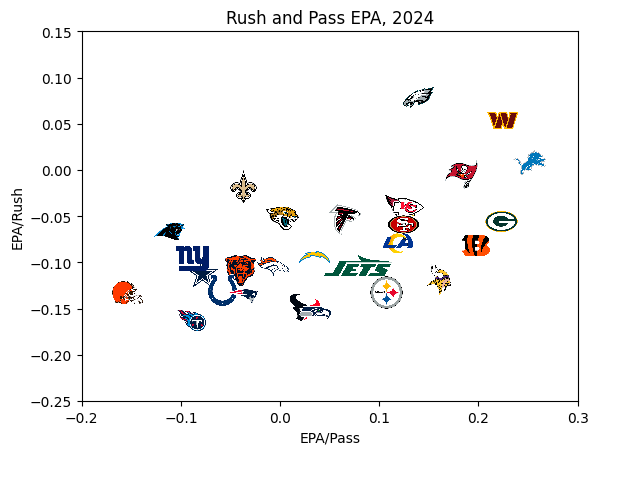

In [ ]:
def getImage(path, team_abbr):
    zoom = 0.05  # Default zoom
    if team_abbr == 'NYJ':  # Example for Jets
        zoom = 0.013
    return OffsetImage(plt.imread(path, format="tif"), zoom=zoom)

x = epa_with_logos['pass_epa_2024']
y = epa_with_logos['rush_epa_2024']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path, team in zip(x, y, paths, epa_with_logos['team_abbr']):
    ab = AnnotationBbox(getImage(path, team), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)
plt.title("Rush and Pass EPA, 2024")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()


In [ ]:
# List of traded offensive players (2024)
traded_players = [
    {"name": "M.Williams", "team": "PIT", "role": "receiver_player_name"},
    {"name": "J.Mingo", "team": "DAL", "role": "receiver_player_name"},
    {"name": "D.Johnson", "team": "BAL", "role": "receiver_player_name"},
    {"name": "D.Hopkins", "team": "KC", "role": "receiver_player_name"},
    {"name": "A.Cooper", "team": "BUF", "role": "receiver_player_name"},
    {"name": "D.Adams", "team": "NYJ", "role": "receiver_player_name"},
    {"name": "K.Herbert", "team": "CIN", "role": "receiver_player_name"},
    {"name": "C.Akers", "team": "MIN", "role": "receiver_player_name"},
    {"name": "K.Herbert", "team": "CIN", "role": "rusher_player_name"},
    {"name": "C.Akers", "team": "MIN", "role": "rusher_player_name"},
    {"name": "C.Robinson", "team": "MIN", "role": "passer_player_name"},
]

# Function to identify ambiguous players
def find_ambiguous_players(pbp_2024, traded_players):
    ambiguous_players = {}
    for role in ['receiver_player_name', 'rusher_player_name', 'passer_player_name']:
        # Group by player name and count unique teams
        player_teams = pbp_2024.groupby(role)['posteam'].nunique().reset_index()
        ambiguous = player_teams[player_teams['posteam'] > 1]

        # Exclude traded players from ambiguous list
        ambiguous = ambiguous[~ambiguous[role].isin([p["name"] for p in traded_players if p["role"] == role])]

        ambiguous_players[role] = ambiguous
    return ambiguous_players

# Function to resolve ambiguous stats for a specific player and team
def resolve_ambiguous_stats(pbp_2024, player_name, role, team):
    # Filter data for the specific player, role, and team
    player_data = pbp_2024[(pbp_2024[role] == player_name) & (pbp_2024['posteam'] == team)]

    # Sum the relevant yardage based on the role
    if role == 'receiver_player_name':
        total_yards = player_data['receiving_yards'].sum()
    elif role == 'rusher_player_name':
        total_yards = player_data['rushing_yards'].sum()
    elif role == 'passer_player_name':
        total_yards = player_data['passing_yards'].sum()
    else:
        raise ValueError("Invalid role. Use 'receiver_player_name', 'rusher_player_name', or 'passer_player_name'.")

    return total_yards

# Example play-by-play data for 2024
pbp_2024 = nfl.import_pbp_data([2024])

# Identify ambiguous players, excluding traded players
ambiguous_players = find_ambiguous_players(pbp_2024, traded_players)

# Optional: Check all ambiguous players and their team associations
for role, players in ambiguous_players.items():
    print(f"\nAmbiguous {role.split('_')[0].capitalize()}s:")
    for player in players[role].unique():
        teams = pbp_2024[pbp_2024[role] == player]['posteam'].unique()
        print(f"{player} is associated with teams: {', '.join(teams)}")


2024 done.
Downcasting floats.

Ambiguous Receivers:
B.Robinson is associated with teams: ATL, WAS
D.Moore is associated with teams: CAR, CHI
J.Brooks is associated with teams: DAL, CAR
J.Hill is associated with teams: BAL, MIA
J.Reynolds is associated with teams: DEN, JAX
J.Ross is associated with teams: PHI, KC
J.Taylor is associated with teams: IND, HOU
J.Williams is associated with teams: DEN, DET
J.Wilson is associated with teams: PHI, MIA
Ja.Williams is associated with teams: NO, DET
M.Valdes-Scantling is associated with teams: BUF, NO
T.Hill is associated with teams: NO, MIA
T.Johnson is associated with teams: LA, NYG
T.Scott is associated with teams: WAS, CHI

Ambiguous Rushers:
B.Allen is associated with teams: NYJ, SF
B.Robinson is associated with teams: ATL, WAS
J.Jackson is associated with teams: TEN, NO
J.Taylor is associated with teams: IND, HOU
J.Williams is associated with teams: DEN, DET
M.Jones is associated with teams: JAX, NE
T.Boyle is associated with teams: MIA, N

In [ ]:
# Function to resolve ambiguous players and aggregate their stats
def resolve_ambiguous_player_stats(pbp_2024, ambiguous_players, play_type):
    resolved_stats = []
    for role, players in ambiguous_players.items():
        for _, row in players.iterrows():
            player_name = row[role]
            # Get teams associated with the ambiguous player
            teams = pbp_2024[pbp_2024[role] == player_name]['posteam'].unique()
            for team in teams:
                # Filter for player and team
                player_data = pbp_2024[(pbp_2024[role] == player_name) & (pbp_2024['posteam'] == team)]

                # Sum the relevant yardage based on the play type
                if play_type == 'pass' and role == 'passer_player_name':
                    total_yards = player_data['passing_yards'].sum()
                elif play_type == 'rush' and role == 'rusher_player_name':
                    total_yards = player_data['rushing_yards'].sum()
                elif play_type == 'receive' and role == 'receiver_player_name':
                    total_yards = player_data['receiving_yards'].sum()
                else:
                    continue

                # Append resolved stats
                resolved_stats.append({'player_name': player_name, 'team': team, 'total_yards': total_yards})

    return pd.DataFrame(resolved_stats)

# Function to collect player yards by play type
def collect_player_yards(pbp_2024, play_type=None, ambiguous_players=None):
    if play_type == 'pass':
        # Passing yards (using passer_player_name)
        player_yards = (
            pbp_2024.groupby('passer_player_name')['passing_yards']
            .sum()
            .reset_index()
            .rename(columns={'passer_player_name': 'player_name', 'passing_yards': 'total_yards'})
        )
    elif play_type == 'rush':
        # Rushing yards (using rusher_player_name)
        player_yards = (
            pbp_2024.groupby('rusher_player_name')['rushing_yards']
            .sum()
            .reset_index()
            .rename(columns={'rusher_player_name': 'player_name', 'rushing_yards': 'total_yards'})
        )
    elif play_type == 'receive':
        # Receiving yards (using receiver_player_name)
        player_yards = (
            pbp_2024.groupby('receiver_player_name')['receiving_yards']
            .sum()
            .reset_index()
            .rename(columns={'receiver_player_name': 'player_name', 'receiving_yards': 'total_yards'})
        )
    else:
        raise ValueError("Invalid play type. Choose 'pass', 'rush', or 'receive'.")

    # Drop players with no recorded name (NaN entries)
    player_yards.dropna(subset=['player_name'], inplace=True)

    # Resolve ambiguous players if applicable
    if ambiguous_players:
        resolved_stats = resolve_ambiguous_player_stats(pbp_2024, ambiguous_players, play_type)
        # Remove ambiguous players from the main DataFrame
        ambiguous_names = [p for players in ambiguous_players.values() for p in players.iloc[:, 0]]
        player_yards = player_yards[~player_yards['player_name'].isin(ambiguous_names)]
        # Add resolved stats back to the main DataFrame
        player_yards = pd.concat([player_yards, resolved_stats], ignore_index=True)

    return player_yards

# Identify ambiguous players (e.g., from earlier code)
ambiguous_players_dict = find_ambiguous_players(pbp_2024, traded_players)

# Collect passing yards
passing_yards = collect_player_yards(pbp_2024, play_type='pass', ambiguous_players=ambiguous_players)
print("Top Passers (Passing Yards):")
print(passing_yards.sort_values(by='total_yards', ascending=False).head(10))

# Collect rushing yards
rushing_yards = collect_player_yards(pbp_2024, play_type='rush', ambiguous_players=ambiguous_players)
print("\nTop Rushers (Rushing Yards):")
print(rushing_yards.sort_values(by='total_yards', ascending=False).head(10))

# Collect receiving yards
receiving_yards = collect_player_yards(pbp_2024, play_type='receive', ambiguous_players=ambiguous_players)
print("\nTop Receivers (Receiving Yards):")
print(receiving_yards.sort_values(by='total_yards', ascending=False).head(10))


Top Passers (Passing Yards):
   player_name  total_yards team
37    J.Burrow       3977.0  NaN
42      J.Goff       3759.0  NaN
33     G.Smith       3623.0  NaN
8   B.Mayfield       3617.0  NaN
61   L.Jackson       3580.0  NaN
75   S.Darnold       3530.0  NaN
57   K.Cousins       3508.0  NaN
67  M.Stafford       3463.0  NaN
35     J.Allen       3395.0  NaN
71   P.Mahomes       3348.0  NaN

Top Rushers (Rushing Yards):
    player_name  total_yards team
220   S.Barkley       1688.0  NaN
65      D.Henry       1474.0  NaN
131    J.Jacobs       1147.0  NaN
178  K.Williams       1121.0  NaN
281  B.Robinson       1102.0  ATL
124     J.Gibbs       1047.0  NaN
35    C.Hubbard       1043.0  NaN
259   T.Pollard        982.0  NaN
8       A.Jones        979.0  NaN
115    J.Conner        973.0  NaN

Top Receivers (Receiving Yards):
        player_name  total_yards team
189         J.Chase       1413.0  NaN
210     J.Jefferson       1243.0  NaN
71           C.Lamb       1089.0  NaN
25      A.St. Brow

In [ ]:
import nfl_data_py as nfl
import pandas as pd

# Load play-by-play data for 2024
pbp_2024 = nfl.import_pbp_data([2024])

# Example of ambiguous players
ambiguous_players = {
    "B.Robinson": ["ATL", "WAS"],
    "D.Moore": ["CAR", "CHI"],
    "J.Brooks": ["DAL", "CAR"],
    "J.Hill": ["BAL", "MIA"],
    "J.Ross": ["PHI", "KC"],
    "J.Taylor": ["IND", "HOU"],
    "J.Williams": ["DEN", "DET"],
    "J.Wilson": ["PHI", "MIA"],
    "T.Hill": ["NO", "MIA"],
    "T.Johnson": ["LA", "NYG"],
    "B.Allen": ["NYJ", "SF"],
    "J.Jackson": ["TEN", "NO"],
}

# Function to process user input into the database format
def get_player_abbreviation(full_name):
    names = full_name.split()
    if len(names) < 2:
        return None
    return f"{names[0][0]}.{names[1]}"  # First initial + last name

# Function to get all stats for a specific player
def get_player_stats(pbp, player_name, team=None):
    # Filter by role and optionally by team for ambiguous players
    passer_stats = pbp[
        (pbp['passer_player_name'] == player_name) & (pbp['posteam'] == team if team else True)
    ].groupby('passer_player_name').agg(
        total_passing_yards=('passing_yards', 'sum'),
        total_passing_attempts=('pass_attempt', 'sum'),
        total_passing_touchdowns=('pass_touchdown', 'sum'),
        total_interceptions=('interception', 'sum'),
    ).reset_index().rename(columns={'passer_player_name': 'player_name'})

    rusher_stats = pbp[
        (pbp['rusher_player_name'] == player_name) & (pbp['posteam'] == team if team else True)
    ].groupby('rusher_player_name').agg(
        total_rushing_yards=('rushing_yards', 'sum'),
        total_rushing_attempts=('rush_attempt', 'sum'),
        total_rushing_touchdowns=('rush_touchdown', 'sum'),
    ).reset_index().rename(columns={'rusher_player_name': 'player_name'})

    receiver_stats = pbp[
        (pbp['receiver_player_name'] == player_name) & (pbp['posteam'] == team if team else True)
    ].groupby('receiver_player_name').agg(
        total_receiving_yards=('receiving_yards', 'sum'),
        total_receptions=('complete_pass', 'sum'),
        total_receiving_touchdowns=('pass_touchdown', 'sum'),
    ).reset_index().rename(columns={'receiver_player_name': 'player_name'})

    # Merge stats into a single DataFrame
    player_stats = pd.DataFrame({'player_name': [player_name]})
    if not passer_stats.empty:
        player_stats = player_stats.merge(passer_stats, on='player_name', how='left')
    if not rusher_stats.empty:
        player_stats = player_stats.merge(rusher_stats, on='player_name', how='left')
    if not receiver_stats.empty:
        player_stats = player_stats.merge(receiver_stats, on='player_name', how='left')

    player_stats.fillna(0, inplace=True)
    return player_stats

# User interface
def main():
    full_name = input("Enter the player's full name (e.g., Patrick Mahomes): ")
    player_name = get_player_abbreviation(full_name)

    if not player_name:
        print("Invalid input. Please provide a full name.")
        return

    # Check if the player is ambiguous
    if player_name in ambiguous_players:
        teams = ambiguous_players[player_name]
        print(f"{full_name} is associated with multiple teams: {', '.join(teams)}")
        team = input("Please enter the team initials (e.g., CHI for Chicago Bears): ").upper()
        if team not in teams:
            print("Invalid team initials. Please try again.")
            return
    else:
        team = None

    # Get player stats
    player_stats = get_player_stats(pbp_2024, player_name, team)

    if player_stats.empty:
        print(f"No stats found for {full_name}. You may have spelled the name wrong or the player does not exist.")
    else:
        print(f"\nStats for {full_name}:")
        print(player_stats)

# Run the program
main()


2024 done.
Downcasting floats.
Enter the player's full name (e.g., Patrick Mahomes): Patrick Mahomes

Stats for Patrick Mahomes:
  player_name  total_passing_yards  total_passing_attempts  \
0   P.Mahomes               3348.0                   538.0   

   total_passing_touchdowns  total_interceptions  total_rushing_yards  \
0                      22.0                 11.0                262.0   

   total_rushing_attempts  total_rushing_touchdowns  total_receiving_yards  \
0                    52.0                       1.0                    2.0   

   total_receptions  total_receiving_touchdowns  
0               1.0                         0.0  


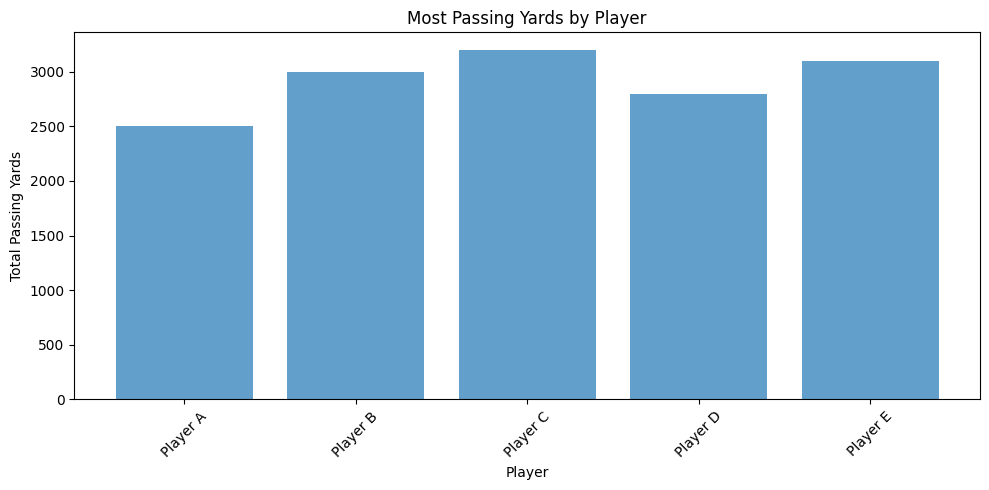

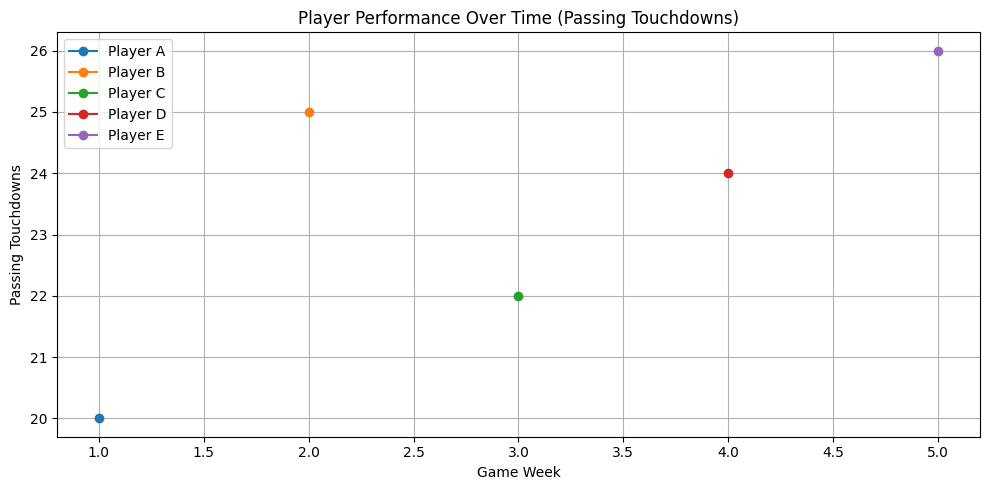

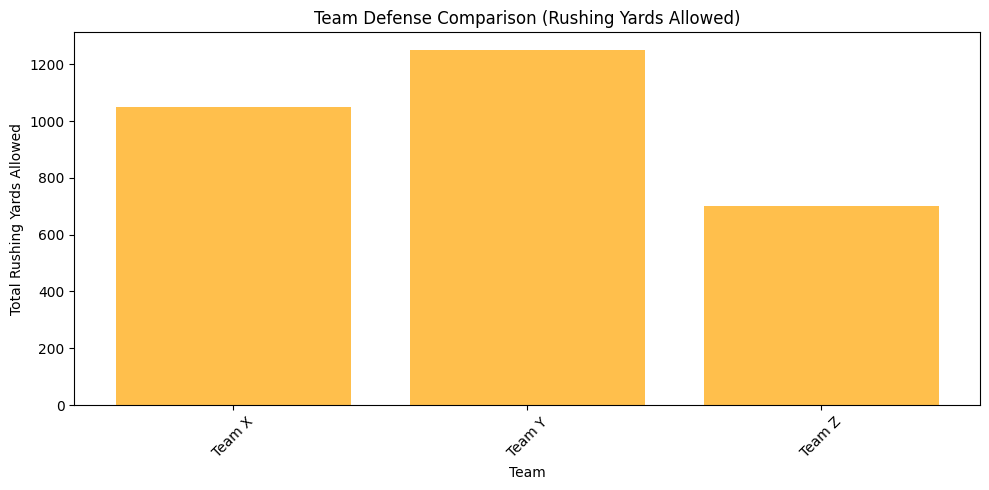

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.DataFrame({'player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E'],'total_passing_yards': [2500, 3000, 3200, 2800, 3100],
    'total_rushing_yards': [500, 600, 700, 550, 650], 'total_passing_touchdowns': [20, 25, 22, 24, 26],'team': ['Team X', 'Team Y', 'Team Z', 'Team X', 'Team Y'],
    'game_week': [1, 2, 3, 4, 5]
})

plt.figure(figsize=(10, 5))
plt.bar(data['player'], data['total_passing_yards'], alpha=0.7)
plt.title('Most Passing Yards by Player')
plt.xlabel('Player')
plt.ylabel('Total Passing Yards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for player in data['player'].unique():
    player_data = data[data['player'] == player]
    plt.plot(player_data['game_week'], player_data['total_passing_touchdowns'], marker='o', label=player)
plt.title('Player Performance Over Time (Passing Touchdowns)')
plt.xlabel('Game Week')
plt.ylabel('Passing Touchdowns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
teams = data.groupby('team')['total_rushing_yards'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(teams['team'], teams['total_rushing_yards'], alpha=0.7, color='orange')
plt.title('Team Defense Comparison (Rushing Yards Allowed)')
plt.xlabel('Team')
plt.ylabel('Total Rushing Yards Allowed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model


# Split the data into training and testing data for regression
epa_x = epa_all_years[['rush_epa']]
epa_y = epa_all_years[['pass_epa']]

epa_x_train, epa_x_test, epa_y_train, epa_y_test = model_selection.train_test_split(epa_x, epa_y, train_size=0.5)

# Fitting linear regression model with pass_epa as response and rush_epa as predictor
model = linear_model.LinearRegression()
model.fit(epa_x_train, epa_y_train)

LinearRegression()

In [ ]:
# For computing sum of squared errors
def sse(resid):
    return np.sum(resid**2)

# SSE for training data
pass_resid_train = epa_y_train - model.predict(epa_x_train)
pass_sse_train = sse(pass_resid_train)
pass_sse_train


,0
pass_epa,0.440254


In [ ]:
# SSE for testing data
pass_resid_test = epa_y_test - model.predict(epa_x_test)
pass_sse_test = sse(pass_resid_test)
pass_sse_test

,0
pass_epa,0.659725


In [ ]:
# Computing r-squared for training data
model.score(epa_x_train, epa_y_train)

0.12124162912368774

In [ ]:
# Computing r-squared for testing data
model.score(epa_x_test, epa_y_test)

0.20834267139434814

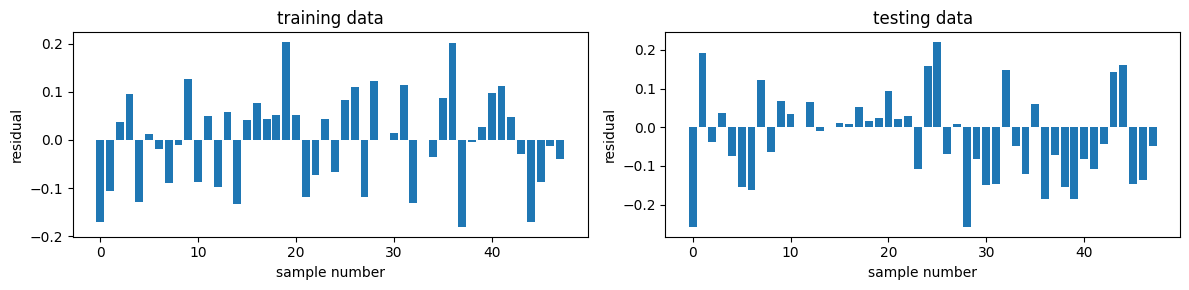

In [ ]:
# Function for plotting residuals
def plot_residualsP_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train['pass_epa'].values)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test['pass_epa'].values)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    fig.tight_layout()
    return fig, axes

fig, ax = plot_residualsP_and_coeff(pass_resid_train, pass_resid_test, model.coef_)

In [ ]:
# Setting up a model with pass as predictor and rush as response
epa_x2 = epa_all_years[['pass_epa']]
epa_y2 = epa_all_years[['rush_epa']]

epa_x2_train, epa_x2_test, epa_y2_train, epa_y2_test = model_selection.train_test_split(epa_x2, epa_y2, train_size=0.5)

model = linear_model.LinearRegression()
model.fit(epa_x2_train, epa_y2_train)

LinearRegression()

In [ ]:
# SSE for training data
rush_resid_train = epa_y2_train - model.predict(epa_x2_train)
rush_sse_train = sse(rush_resid_train)
rush_sse_train

,0
rush_epa,0.181686


In [ ]:
# SSE for testing data
rush_resid_test = epa_y2_test - model.predict(epa_x2_test)
rush_sse_test = sse(rush_resid_test)
rush_sse_test

,0
rush_epa,0.219757


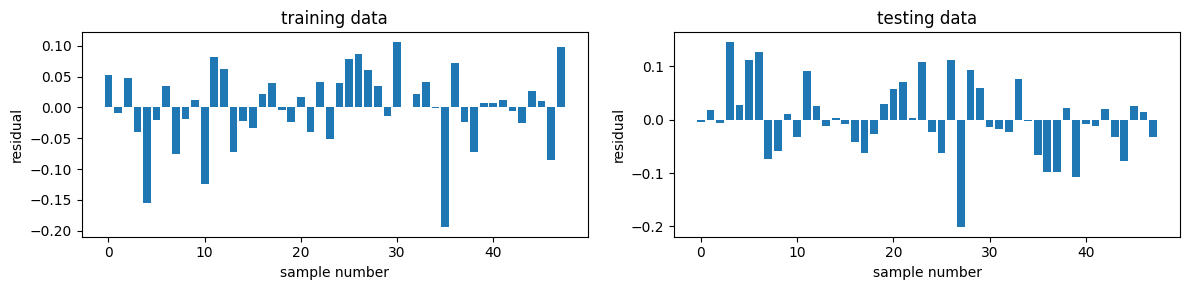

In [ ]:
def plot_residualsR_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train['rush_epa'].values)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test['rush_epa'].values)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    fig.tight_layout()
    return fig, axes

fig, ax = plot_residualsR_and_coeff(rush_resid_train, rush_resid_test, model.coef_)

In [ ]:
# Computing r-squared for testing data
model.score(epa_x2_test, epa_y2_test)

0.2450098991394043

In [ ]:
# Computing r-squared for testing data
model.score(epa_x2_train, epa_y2_train)

0.24768579006195068

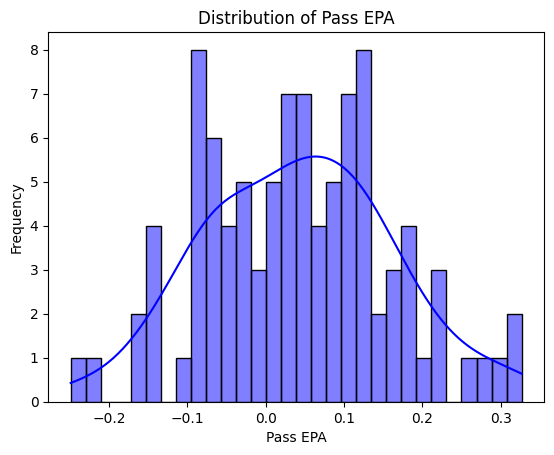

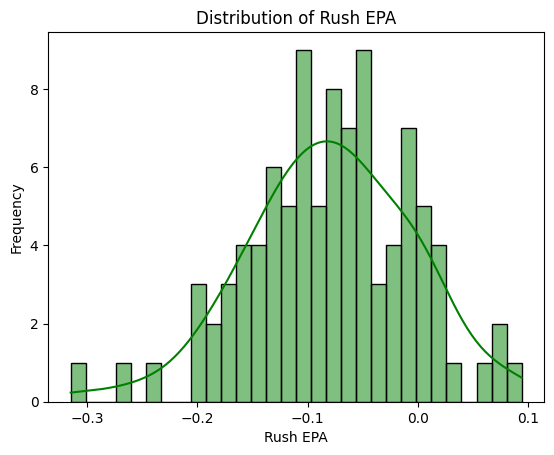

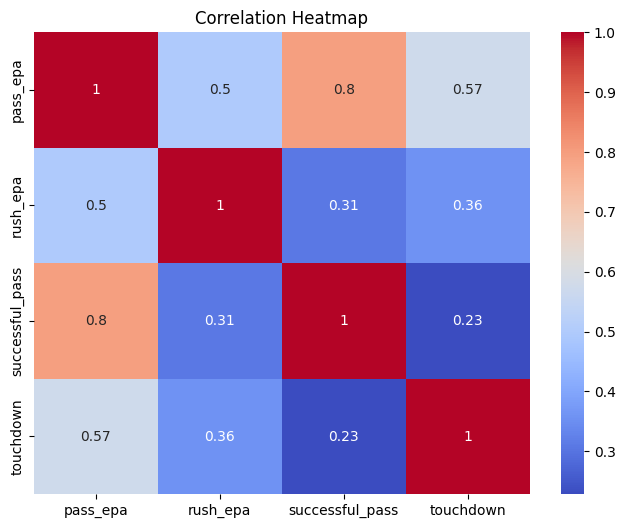

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns


# Clean and preprocess the data
epa_all_years.dropna(subset=['pass_epa', 'rush_epa'], inplace=True)

epa_all_years['successful_pass'] = (epa_all_years['pass_epa'] > 0).astype(int)  # Successful pass: EPA > 0
epa_all_years['touchdown'] = (epa_all_years['pass_epa'] > 0.2).astype(int)      # Touchdown: EPA > 0.2

# Visualize distributions
sns.histplot(epa_all_years['pass_epa'], kde=True, bins=30, color='blue')
plt.title('Distribution of Pass EPA')
plt.xlabel('Pass EPA')
plt.ylabel('Frequency')
plt.show()

sns.histplot(epa_all_years['rush_epa'], kde=True, bins=30, color='green')
plt.title('Distribution of Rush EPA')
plt.xlabel('Rush EPA')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(epa_all_years[['pass_epa', 'rush_epa', 'successful_pass', 'touchdown']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AUC-ROC for Successful Passes: 0.73


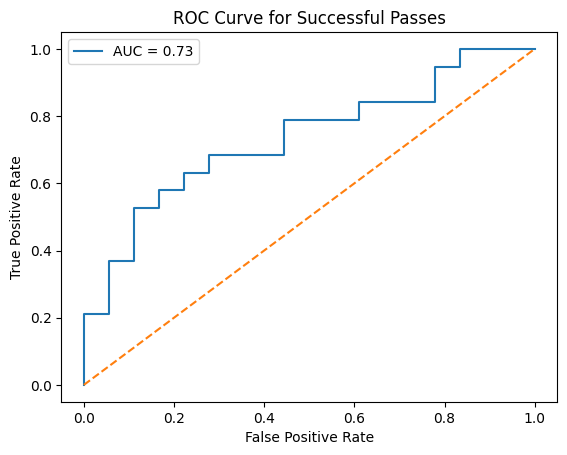

In [ ]:
# Features and target for successful passes
X_pass = epa_all_years[['rush_epa']]  # Add more features as needed
y_pass = epa_all_years['successful_pass']

# Resample data using SMOTE
smote = SMOTE(random_state=42)
X_pass_resampled, y_pass_resampled = smote.fit_resample(X_pass, y_pass)

# Train-test split
X_train_pass, X_test_pass, y_train_pass, y_test_pass = train_test_split(X_pass_resampled, y_pass_resampled, test_size=0.3, random_state=42)

# Logistic regression for successful passes
log_reg_pass = LogisticRegression()
log_reg_pass.fit(X_train_pass, y_train_pass)

# Predict probabilities
y_pred_prob_pass = log_reg_pass.predict_proba(X_test_pass)[:, 1]

# Evaluate the model
roc_auc_pass = roc_auc_score(y_test_pass, y_pred_prob_pass)
print(f"AUC-ROC for Successful Passes: {roc_auc_pass:.2f}")

# Plot ROC Curve
fpr_pass, tpr_pass, _ = roc_curve(y_test_pass, y_pred_prob_pass)
plt.plot(fpr_pass, tpr_pass, label=f"AUC = {roc_auc_pass:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Successful Passes")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AUC-ROC for Touchdowns: 0.97


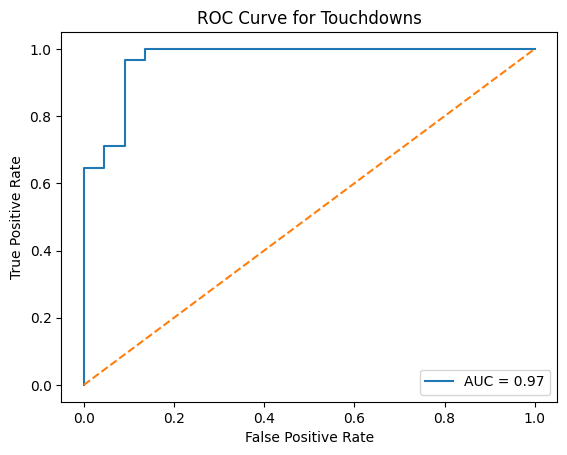

In [ ]:
# Features and target for touchdowns
X_td = epa_all_years[['rush_epa']]  # Add more features as needed
y_td = epa_all_years['touchdown']

# Resample data using SMOTE
X_td_resampled, y_td_resampled = smote.fit_resample(X_td, y_td)

# Train-test split
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(X_td_resampled, y_td_resampled, test_size=0.3, random_state=42)

# Logistic regression for touchdowns
log_reg_td = LogisticRegression()
log_reg_td.fit(X_train_td, y_train_td)

# Predict probabilities
y_pred_prob_td = log_reg_td.predict_proba(X_test_td)[:, 1]

# Evaluate the model
roc_auc_td = roc_auc_score(y_test_td, y_pred_prob_td)
print(f"AUC-ROC for Touchdowns: {roc_auc_td:.2f}")

# Plot ROC Curve
fpr_td, tpr_td, _ = roc_curve(y_test_td, y_pred_prob_td)
plt.plot(fpr_td, tpr_td, label=f"AUC = {roc_auc_td:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Touchdowns")
plt.legend()
plt.show()


In [ ]:
# Precision-Recall Curve for Touchdowns
precision_td, recall_td, thresholds_td = precision_recall_curve(y_test_td, y_pred_prob_td)
optimal_idx = (precision_td * recall_td).argmax()
optimal_threshold = thresholds_td[optimal_idx]

print(f"Optimal Threshold for Touchdowns: {optimal_threshold:.2f}")

# Predict with adjusted threshold
y_pred_td_adjusted = (y_pred_prob_td >= optimal_threshold).astype(int)

# Evaluate with adjusted threshold
print("\nClassification Report for Touchdowns (Adjusted Threshold):")
print(classification_report(y_test_td, y_pred_td_adjusted))


Optimal Threshold for Touchdowns: 0.46

Classification Report for Touchdowns (Adjusted Threshold):
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.91      1.00      0.95        31

    accuracy                           0.94        53
   macro avg       0.96      0.93      0.94        53
weighted avg       0.95      0.94      0.94        53

